#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [1]:
import torch as th
import torch.nn as nn

In [2]:
fc = nn.Linear(10, 15)

In [3]:
# fc.weight = th.zeros_like(fc.weight)

In [4]:
import torch.nn.init as init

In [5]:
init.ones_(fc.weight)

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

In [6]:
x = th.ones((5, 5))
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [7]:
dropout = nn.Dropout(p=0.5)
dropout(x)

tensor([[0., 2., 0., 2., 0.],
        [0., 0., 0., 0., 2.],
        [2., 0., 2., 2., 0.],
        [2., 0., 0., 0., 2.],
        [0., 2., 2., 2., 2.]])

In [8]:
net = nn.Sequential(
    nn.Linear(5, 2),
    nn.Dropout(p=0.5),
    # nn.Linear(2, 1)
)
net.train()
x = th.ones((10, 5))
net.eval()
net(x)

tensor([[-0.1135,  1.0607],
        [-0.1135,  1.0607],
        [-0.1135,  1.0607],
        [-0.1135,  1.0607],
        [-0.1135,  1.0607],
        [-0.1135,  1.0607],
        [-0.1135,  1.0607],
        [-0.1135,  1.0607],
        [-0.1135,  1.0607],
        [-0.1135,  1.0607]], grad_fn=<AddmmBackward0>)

3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

In [9]:
x = th.rand(5, 3)
x

tensor([[0.8021, 0.2590, 0.3961],
        [0.2503, 0.6393, 0.8962],
        [0.8310, 0.8444, 0.2904],
        [0.2346, 0.4425, 0.1593],
        [0.5087, 0.9871, 0.6987]])

In [10]:
x.mean(dim=0), x.std(dim=0)

(tensor([0.5254, 0.6345, 0.4881]), tensor([0.2874, 0.2942, 0.3027]))

In [11]:
bn = nn.BatchNorm1d(num_features=3)
x1 = bn(x)
x1

tensor([[ 1.0765, -1.4266, -0.3400],
        [-1.0698,  0.0183,  1.5071],
        [ 1.1888,  0.7978, -0.7301],
        [-1.1307, -0.7294, -1.2144],
        [-0.0647,  1.3399,  0.7775]], grad_fn=<NativeBatchNormBackward0>)

In [12]:
x1.mean(dim=0), x1.std(dim=0)

(tensor([ 4.7684e-08,  7.1526e-08, -4.7684e-08], grad_fn=<MeanBackward1>),
 tensor([1.1179, 1.1180, 1.1180], grad_fn=<StdBackward0>))

In [13]:
bn.running_mean, bn.running_var

(tensor([0.0525, 0.0634, 0.0488]), tensor([0.9083, 0.9087, 0.9092]))

In [14]:
y = th.rand(5, 3)
y1 = bn(y)
y1

tensor([[-0.2630, -1.3080,  0.9505],
        [-0.0130, -0.7274, -1.5325],
        [-1.2325, -0.1700,  1.2313],
        [-0.3116,  1.4891, -0.2234],
        [ 1.8201,  0.7163, -0.4259]], grad_fn=<NativeBatchNormBackward0>)

In [15]:
bn.running_mean, bn.running_var

(tensor([0.1018, 0.0995, 0.0955]), tensor([0.8214, 0.8285, 0.8313]))

In [16]:
bn.eval()

BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [17]:
net = nn.Sequential(
    # ...
    nn.Linear(5, 2),
    nn.BatchNorm1d(2),
    nn.ReLU(),
    # nn.Linear(2, 1)
)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init` (инициализацию bias оставьте по умолчанию). Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
```

- [ ] Проверено на семинаре

In [19]:
import torch.nn as nn

In [40]:
class InitializedLinear(nn.Linear):
  def __init__(self,n_features, n_hidden, init_f=nn.init.normal_, init_args={}):
      super().__init__(n_features, n_hidden)
      init_f(self.weight, **init_args)

In [46]:
#n_features = 10
#n_hidden = 6
#init_args = {"a": 0.0, "b": 1.0}

In [44]:
fc = InitializedLinear(n_features = 6, 
                       n_hidden = 10, 
                       init_f=nn.init.uniform_, 
                       init_args={"a": 0.0, "b": 1.0})

In [45]:
fc.weight

Parameter containing:
tensor([[0.9089, 0.8035, 0.6152, 0.2091, 0.1302, 0.9313],
        [0.3879, 0.9498, 0.8103, 0.7078, 0.5985, 0.7412],
        [0.7763, 0.7466, 0.6106, 0.5315, 0.3207, 0.4633],
        [0.2216, 0.1364, 0.5390, 0.4310, 0.2017, 0.9589],
        [0.8041, 0.9005, 0.2774, 0.2217, 0.3127, 0.0080],
        [0.0524, 0.3659, 0.5612, 0.8033, 0.0842, 0.1601],
        [0.1471, 0.4084, 0.8819, 0.4220, 0.8043, 0.2809],
        [0.1041, 0.0771, 0.6509, 0.0330, 0.0585, 0.3466],
        [0.6562, 0.9243, 0.0856, 0.7114, 0.5405, 0.5193],
        [0.7371, 0.7094, 0.5664, 0.0415, 0.2316, 0.2640]], requires_grad=True)

<p class="task" id="2"></p>

2\. Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_`
* `nn.kaiming_uniform_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Для улучшения читаемости графиков можно рассматривать области экстремальных значений отдельно.

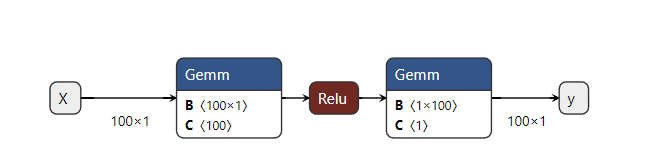

- [ ] Проверено на семинаре

In [58]:
from torch.nn.init import uniform_, normal_, constant_, xavier_uniform_, kaiming_uniform_
import torch.optim as optim
import matplotlib.pyplot as plt

In [59]:
import torch as th
X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())

In [62]:
initializations = [
    (nn.init.uniform_, {'a': 0, 'b': 1}),
    (nn.init.normal_, {'mean': 0, 'std': 1}),
    (nn.init.constant_, {'val': 0.5}),
    (nn.init.xavier_uniform_, {'gain': nn.init.calculate_gain('relu')}),
    (nn.init.kaiming_uniform_, {'a': 0, 'mode': 'fan_in', 'nonlinearity': 'relu'})
]

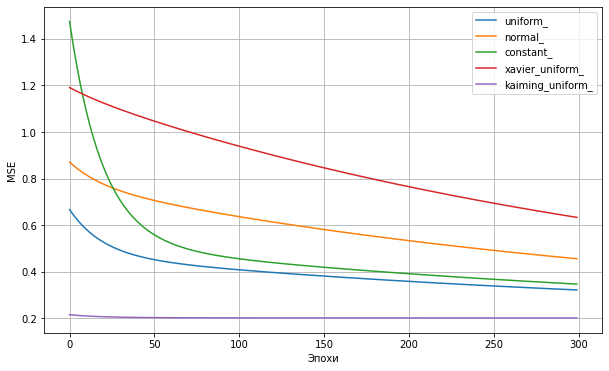

In [63]:
num_epochs = 300
learning_rate = 0.01
criterion = nn.MSELoss()
mse_values = [[] for _ in initializations]

for k, (init_func, init_args) in enumerate(initializations):
    model = nn.Linear(1, 1)
    init_func(model.weight, **init_args)

    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    mse_values_k = []

    for epoch in range(num_epochs):
        outputs = model(X)
        loss = criterion(outputs, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        mse = loss.item()
        mse_values_k.append(mse)

    mse_values[k] = mse_values_k

plt.figure(figsize=(10, 6))
for k, (init_func, init_args) in enumerate(initializations):
    plt.plot(range(num_epochs), mse_values[k], label=f'{init_func.__name__}')

plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


<p class="task" id="3"></p>

3\. Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

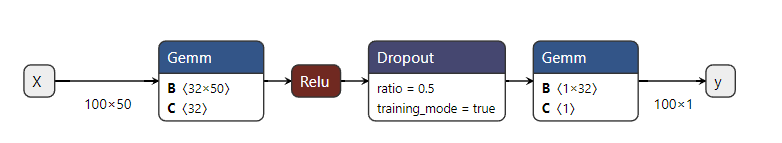

- [ ] Проверено на семинаре

In [84]:
from sklearn.datasets import make_regression
import torch as th
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score


th.manual_seed(42)
X, y, coef = make_regression(
    n_samples=100,
    n_features=50,
    n_informative=20,
    noise=2,
    coef=True,
    random_state=42,

)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
train_r2_values = []
test_r2_values = []

gamma = 0.01
criterion = nn.L1Loss()
num_epochs = 40

In [86]:
for p in probs:
    model = nn.Sequential(
        nn.Linear(X.shape[1], 32),
        nn.ReLU(),
        nn.Dropout(p=p),
        nn.Linear(32, 1)
    )
    optimizer = optim.SGD(model.parameters(), lr=gamma)

    train_r2 = []
    test_r2 = []

    for epoch in range(num_epochs):
        model.train()
        y_train_pred = model(X_train)
        loss = criterion(y_train_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        y_test_pred = model(X_test)

        train_r2_value = r2_score(y_train.detach().numpy(), y_train_pred.detach().numpy())
        test_r2_value = r2_score(y_test.detach().numpy(), y_test_pred.detach().numpy())

        train_r2.append(train_r2_value)
        test_r2.append(test_r2_value)

    train_r2_values.append(train_r2)
    test_r2_values.append(test_r2)

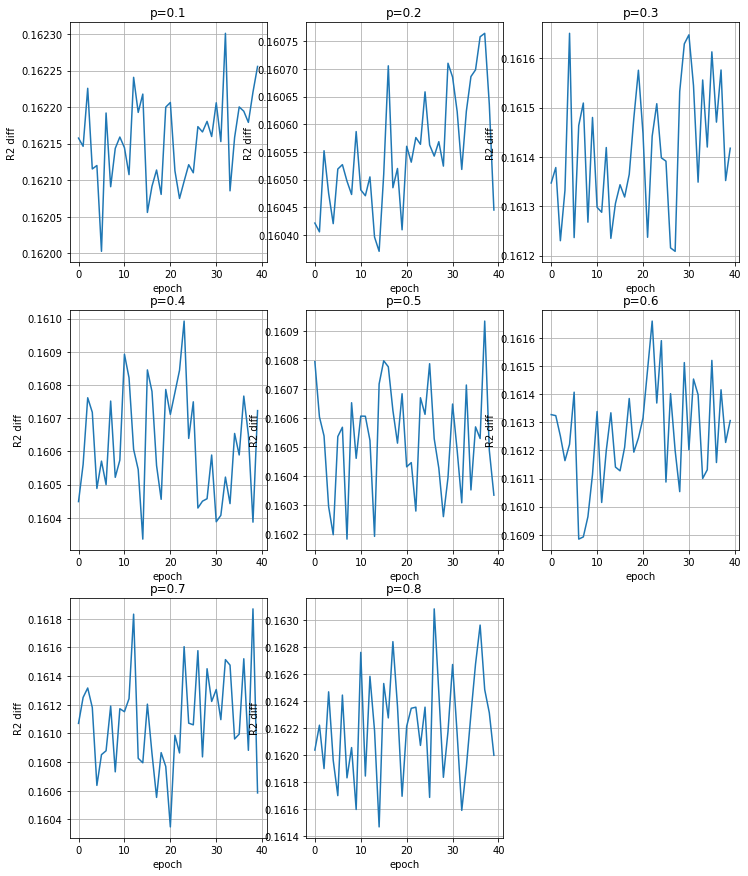

In [90]:
import numpy as np
plt.figure(figsize=(12, 15))
for i, p in enumerate(probs):
    plt.subplot(3, 3, i+1)
    plt.plot(range(num_epochs), np.array(train_r2_values[i]) - np.array(test_r2_values[i]))
    plt.title(f'p={p}')
    plt.xlabel('epoch')
    plt.ylabel('R2 diff')
    plt.grid(True)

plt.show()


<p class="task" id="4"></p>

4\. Решите задачу регрессии с- и без использования пакетной нормализации. Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох.

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с- и без использования пакетной нормализации.

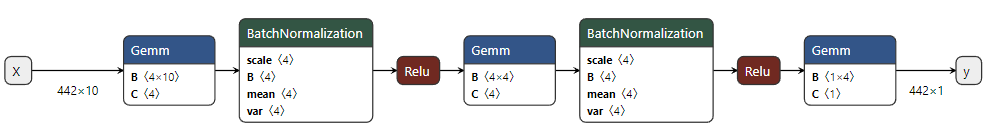

- [ ] Проверено на семинаре

In [91]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
y = (y - y.mean())/y.std()

In [92]:
class RegressionModelNoBN(nn.Module):
    def __init__(self, input_size):
        super(RegressionModelNoBN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# пакетная нормализация
class RegressionModelBN(nn.Module):
    def __init__(self, input_size):
        super(RegressionModelBN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.bn = nn.BatchNorm1d(64)  # Пакетная нормализация
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.bn(out)
        out = self.fc2(out)
        return out

def train_model(model, X_train, y_train, learning_rate, num_epochs):
    criterion = nn.L1Loss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    train_r2_values = []

    for epoch in range(num_epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_r2 = r2_score(y_train.detach().numpy(), y_pred.detach().numpy())
        train_r2_values.append(train_r2)

    return train_r2_values

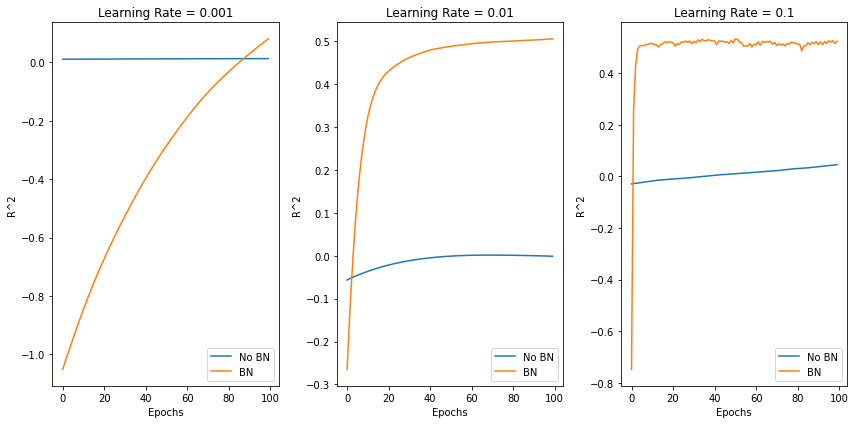

In [93]:
X_train = X
y_train = y

# Параметры
learning_rates = [0.001, 0.01, 0.1]
num_epochs = 100

train_r2_values_no_bn = []
train_r2_values_bn = []

# Обучение моделей с разными скоростями обучения и запись значений R^2
for learning_rate in learning_rates:
    model_no_bn = RegressionModelNoBN(X_train.shape[1])
    train_r2_values_no_bn.append(train_model(model_no_bn, X_train, y_train, learning_rate, num_epochs))

    model_bn = RegressionModelBN(X_train.shape[1])
    train_r2_values_bn.append(train_model(model_bn, X_train, y_train, learning_rate, num_epochs))

plt.figure(figsize=(12, 6))
for i, learning_rate in enumerate(learning_rates):
    plt.subplot(1, 3, i + 1)
    plt.plot(range(num_epochs), train_r2_values_no_bn[i], label='No BN')
    plt.plot(range(num_epochs), train_r2_values_bn[i], label='BN')
    plt.xlabel('Epochs')
    plt.ylabel('R^2')
    plt.title(f'Learning Rate = {learning_rate}')
    plt.legend()

plt.tight_layout()
plt.show()

<p class="task" id="5"></p>

5\. Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagram, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения. Используйте модель с архитектурой, аналогичной модели из предыдущей задачи.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

- [ ] Проверено на семинаре

In [94]:
def load_boston():
    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

In [95]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [99]:
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Функция для обучения модели
def train_model(model, X_train, y_train, optimizer, num_epochs):
    criterion = nn.L1Loss()
    mape_values = []

    for epoch in range(num_epochs):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        mape = mean_absolute_error(y_train.detach().numpy(), y_pred.detach().numpy())
        mape_values.append(mape)

    return mape_values

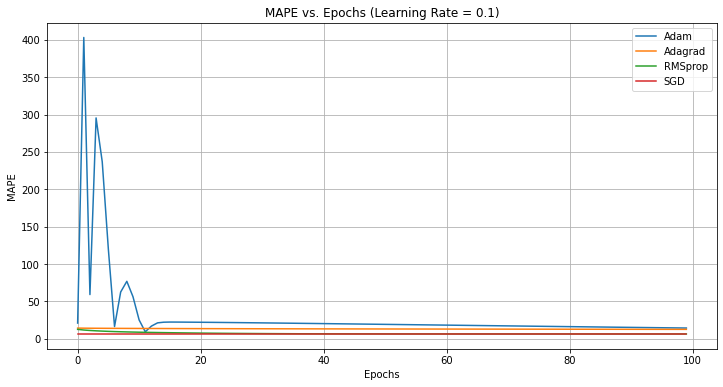

In [103]:
from sklearn.metrics import mean_absolute_error
X_train = X
y_train = y

# Параметры
learning_rate = 0.1
num_epochs = 100

model = RegressionModel(X_train.shape[1])
optimizers = {
    'Adam': optim.Adam(model.parameters(), lr=learning_rate),
    'Adagrad': optim.Adagrad(model.parameters(), lr=learning_rate),
    'RMSprop': optim.RMSprop(model.parameters(), lr=learning_rate),
    'SGD': optim.SGD(model.parameters(), lr=learning_rate)
}

mape_values = {optimizer_name: train_model(model, X_train, y_train, optimizer, num_epochs) for optimizer_name, optimizer in optimizers.items()}

plt.figure(figsize=(12, 6))
for optimizer_name, mape_value in mape_values.items():
    plt.plot(range(num_epochs), mape_value, label=optimizer_name)

plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title(f'MAPE vs. Epochs (Learning Rate = {learning_rate})')
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="6"></p>

6\. Решите задачу регрессии c использованием ранней остановки. Разбейте набор данных на обучающую и валидационную выборку в соотношении 80 на 20. Остановите процесс обучения, если целевая метрика (MAPE) не уменьшалась в течении последних $k$ ($k$ - гиперпараметр метода) эпох. В момент остановки выведите сообщение с текущим номером эпохи.

- [ ] Проверено на семинаре

In [ ]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

## Обратная связь
- [ ] Хочу получить обратную связь по решению